In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt
import cartopy as cp
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.io.shapereader as shapereader
import calendar

from pathlib import Path

In [2]:
des = xr.open_dataset("MERRA2_400.tavgM_2d_aer_Nx.202301-12.nc4")

In [38]:
des

<xarray.Dataset>
Dimensions:        (time: 12, lon: 576, lat: 361)
Coordinates:
  * time           (time) datetime64[ns] 2023-01-01T00:30:00 ... 2023-12-01T0...
  * lon            (lon) float64 -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
  * lat            (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
Data variables: (12/100)
    BCANGSTR       (time, lat, lon) float32 ...
    BCCMASS        (time, lat, lon) float32 ...
    BCEXTTAU       (time, lat, lon) float32 ...
    BCFLUXU        (time, lat, lon) float32 ...
    BCFLUXV        (time, lat, lon) float32 ...
    BCSCATAU       (time, lat, lon) float32 ...
    ...             ...
    Var_SUFLUXU    (time, lat, lon) float32 ...
    Var_SUFLUXV    (time, lat, lon) float32 ...
    Var_SUSCATAU   (time, lat, lon) float32 ...
    Var_TOTANGSTR  (time, lat, lon) float32 ...
    Var_TOTEXTTAU  (time, lat, lon) float32 ...
    Var_TOTSCATAU  (time, lat, lon) float32 ...
Attributes: (12/32)
    CDI:                               Climate Data Interface version 1.9.9rc...
    history:                           Wed Feb 21 12:07:07 2024: cdo mergetim...
    Conventions:                       CF-1
    Contact:                           http://gmao.gsfc.nasa.gov
    History:                           Original file generated: Sun Feb 12 02...
    Filename:                          MERRA2_400.tavgM_2d_aer_Nx.202301.nc4
    ...                                ...
    LongitudeResolution:               0.625
    DataResolution:                    0.5 x 0.625
    identifier_product_doi:            10.5067/FH9A0MLJPC7N
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000
    CDO:                               Climate Data Operators version 1.9.9rc...

In [84]:
desy=des.DUCMASS25
dessy = des.Var_DUCMASS25

In [85]:
dessy

<xarray.DataArray 'Var_DUCMASS25' (time: 12, lat: 361, lon: 576)>
[2495232 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01T00:30:00 ... 2023-12-01T00:30:00
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
Attributes:
    long_name:       Variance_of_DUCMASS25
    units:           kg m-2 kg m-2
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0

In [86]:
#dd=desy.to_dataframe()
#dd

In [87]:
da_ghana = dessy.sel(lon = slice(-3.5,1.5), lat= slice(4,11.5))

In [88]:
da_ghana.max()

<xarray.DataArray 'Var_DUCMASS25' ()>
array(5.00886763e-08)

In [89]:
shp_path = Path('gh_wgs16dregions.shp')
adm1_shapes = list(shapereader.Reader(str(shp_path)).geometries())


In [90]:
# fig,ax=plt.subplots(4,3,figsize=(10,10),
#                     subplot_kw={'projection':ccrs.PlateCarree()})
# ax=ax.flatten()
# #month_names=['2015','2016','2017','2018','2019','2020','2021','2022','2023']
# for i in range(12):
#     ax[i].add_geometries(adm1_shapes, ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.8)
#     ax[i].add_feature(cf.COASTLINE,linewidth=0.5)
#     ax[i].add_feature(cf.BORDERS,linewidth=2)
#     ax[i].add_feature(cf.STATES,linewidth=0.5)
#     #ax[i].add_feature(cfeature.COASTLINE.OCEAN)
#     ax[i].add_feature(cf.LAKES,color='white')
#     #ax[i].add_feature(cfeature.RIVERS)
#     ax[i].set_extent([-3.4,1.4,4.5,11.5])
#     #ax[i].set_title(month_names[i])
#     cb= ax[i].contourf(da_ghana.lon, da_ghana.lat, da_ghana[i],
#                       cmap='terrain_r', transform=ccrs.PlateCarree())
#     #ax[i].contourf(da_ghana.lon, da_ghana.lat, da_ghana.time,cmap='terrain_r', transform=ccrs.PlateCarree())
#     color_bar=fig.add_axes([-3.5,1.5,4.5,11.5])
# fig.colorbar(cb,cax=color_bar,label='precipitation')

# fig.subplots_adjust(wspace=-0.15, top=0.93)
# plt.suptitle('DECADAL ANNUAL VARIABILITY OF RAINFALL IN AFRICA FROM 2015-2023', fontweight='bold')
# # plt.savefig('d1.png')    

In [91]:
#da_ghana.time = ['January','February','March','April','May','June','July','August','September','October','November','December']

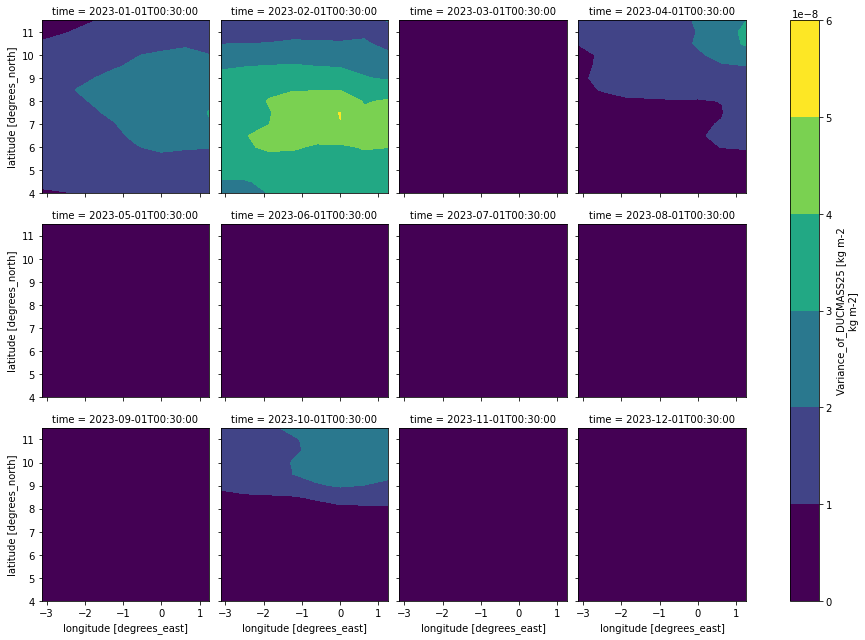

In [92]:
#month_names=['2015','2016','2017','2018','2019','2020','2021','2022','2023','sept','denc','nov']

da_ghana.plot.contourf(x='lon',y='lat', col='time', col_wrap=4)
#ax.set_title("months")

# ax = axes[0]
# axes[0].set_title('2015 - 2023',fontsize=20)

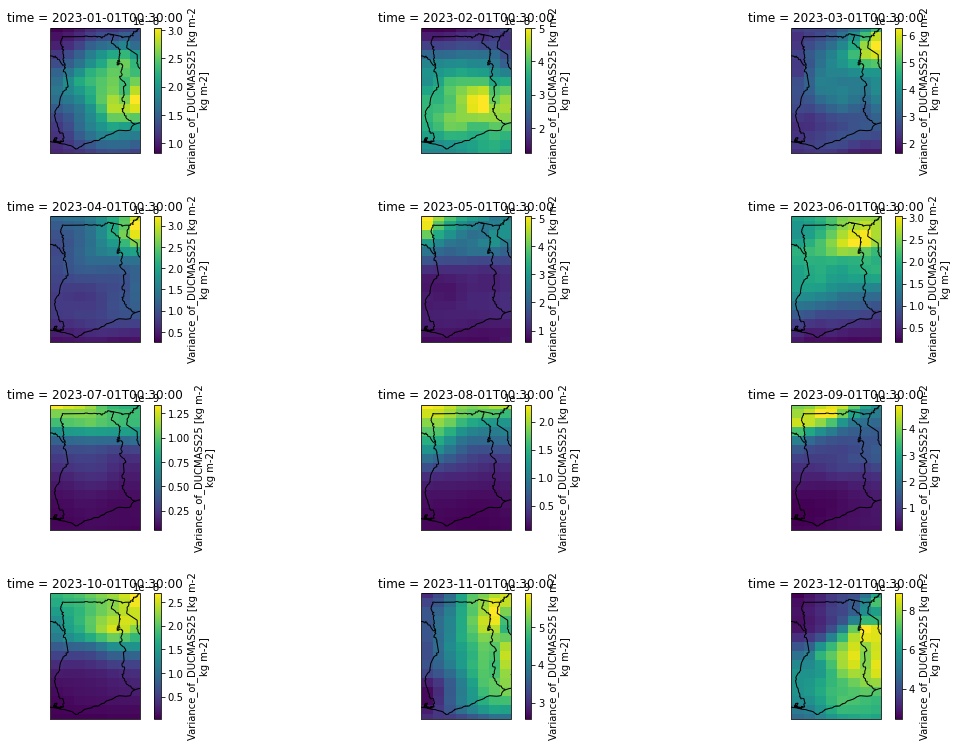

In [93]:
count=0
fig=plt.figure(figsize=(19,12))
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.85, top=0.9, wspace=0.3, hspace=0.5)

 
for time in da_ghana.time:
    count +=1
    ax=fig.add_subplot(4,3, count, projection =ccrs.PlateCarree())
    da_ghana[da_ghana.time==time].plot()
#     ax.coastlines(resolution='110m')    
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.BORDERS)
#     ax.add_feature(cf.OCEAN)
    ax.set_extent([-3.5,1.5,4.5,11.5])

In [94]:
months=["Jan","Feb","March","April","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"]

Text(0.5, 0.98, 'Dust Column Mass Density PM$_{2.5}$ in 2023 over Ghana (January-December)')

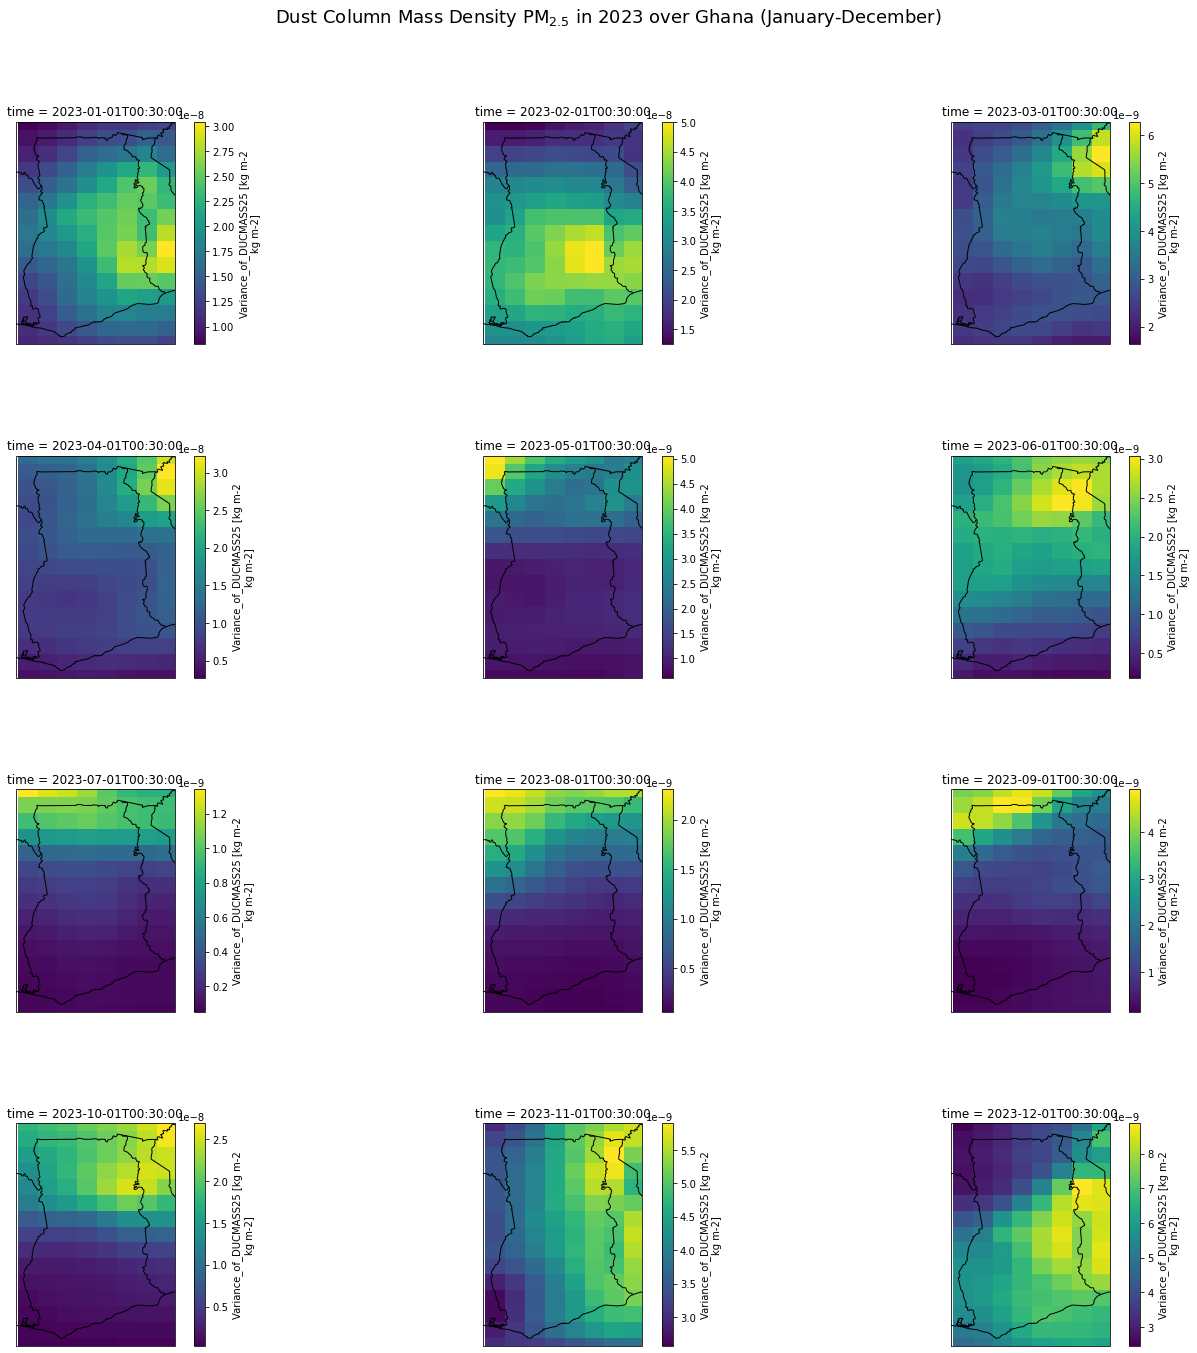

In [95]:
count = 0
fig = plt.figure(figsize=(23, 20))
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.85, top=0.9, wspace=0.2, hspace=0.5)

# Assuming da_ghana is your xarray DataArray
for time in da_ghana.time:
    count += 1
    ax = fig.add_subplot(4, 3, count,  projection=ccrs.PlateCarree())
    da_ghana.sel(time=time).plot(ax=ax)
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.BORDERS)
    ax.set_extent([-3.5, 1.5, 4.5, 11.5])
   
    #ax.set_title("months")
    #ax.set_adjustable('datalim')
    #ax.set_anchor('NE')
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# Create a colorbar at the rightmost position of the figure
#cax = plt.axes([0.87, 0.1, 0.02, 0.8])  # Adjust these values based on your layout
#cbar = plt.colorbar(ax.collections[0], cax=cax, orientation='vertical', label='Dust Column Mass Density PM$_{2.5}$')
plt.suptitle('Dust Column Mass Density PM$_{2.5}$ in 2023 over Ghana (January-December)', fontsize=18)


In [15]:
# import calendar

# count = 0
# fig = plt.figure(figsize=(23, 20))
# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.82, top=0.9, wspace=0.2, hspace=0.5)

# # Define a list of colors for each subplot
# subplot_colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'yellow', 'olive']

# # Assuming da_ghana is your xarray DataArray
# for i, time in enumerate(da_ghana.time):
#     count += 1
#     ax = fig.add_subplot(4, 3, count,  projection=ccrs.PlateCarree())
#     da_ghana.sel(time=time).plot(ax=ax, color=subplot_colors[i])
#     ax.add_feature(cf.COASTLINE)
#     ax.add_feature(cf.BORDERS)
#     ax.set_extent([-3.5, 1.5, 4.5, 11.5])
   
#     # Add a title for each subplot with the month name
#     ax.set_title(time.strftime("%B"))  # Use strftime to get the full month name

# # Create a colorbar at the rightmost position of the figure
# cax = plt.axes([0.87, 0.1, 0.02, 0.8])  # Adjust these values based on your layout
# cbar = plt.colorbar(ax.collections[0], cax=cax, orientation='vertical', label='Dust Column Mass Density PM$_{2.5}$')
# plt.suptitle('Dust Column Mass Density PM$_{2.5}$ over Ghana', fontsize=16)

# plt.show()